# Data Analysis and Machine Learning Model  for "THE FACTORS AFFECTING CAMPUS PLACEMENTS" dataset

Author: Upasana Agrawal

Date: 05/01/2020

Place: San Francisco, California

This project focuses on building machine learning model for analyzing the factors affecting the campus placement. The project is divided into various steps such as:

1. Define: Defining the problem statement.
2. Discover: Analyzing the dataset, discovering the outliers, data wrangling, cleaning data and finalizing the data for data analysis and model building.
3. Design: Building model using machine learning algorithms to see which model fits the best for predicting the factors affecting the campus placement. 
4. Deploy: Finalizing the model for predicing the factors affecting the placement. 

# DEFINE

The AIM of this project is to determine the following:
    1. Does SSC and HSC percentage affects placement?
    2. Does Degree percentage affects placement?
    3. Does MBA degree percentage affects placement?
    4. Does GPA affects the placement?
    5. Is salary dependent on any factors?

Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn import metrics

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings ('ignore')

Loading Data in a variable

The dataset is taken from Kaggle. This data set consists of Placement data of students in our campus. It includes secondary and higher secondary school percentage and specialization. It also includes degree specialization, type and Work experience and salary offers to the placed students. 

In [2]:
placement = pd.read_csv(r'C:\Users\upasa\OneDrive\Desktop\Data Analysis\Placement_Data_Full_Class.csv')

Exploring the dataset

In [3]:
placement.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not_Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In this dataset there are 8 categorical variables and 7 numerical variables.

In [4]:
placement.shape

(215, 15)

There are total 215 rows and 15 columns. 

# DISCOVER

In this step, I would be exploring and visualizing the data.This will involve the following:
    1. Examining the data types in the dataset. 
    2. Understanding the basic statistics summary.
    3. Identifying the patterns and insights from the dataset by plotting the histogram graph.
    4. Feature Engineering: Discovering the new features in the dataset.
    5. Imputing the missing values in the dataset.
    6. Applying Numeric feature engineering techniques.
    7. Dealing with counts.
    8. Transformation of the data.
    9. Applying categorical Feature Engineering techniques.

These various steps carried out would give us the final data (clean and good data) for applying Machine Learning Algorithms. 

###  Exploring and Visualizing Data

1. Examining the datatypes in the dataset

In [5]:
placement.shape

(215, 15)

In [6]:
placement.dtypes

sl_no               int64
gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object

In [7]:
placement.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

2. Examining the basic statistic summary

In [8]:
placement.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


3. Identifying the patterns and insights from the dataset by plotting the histogram graph

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023B9F8C2358>,
      dtype=object)

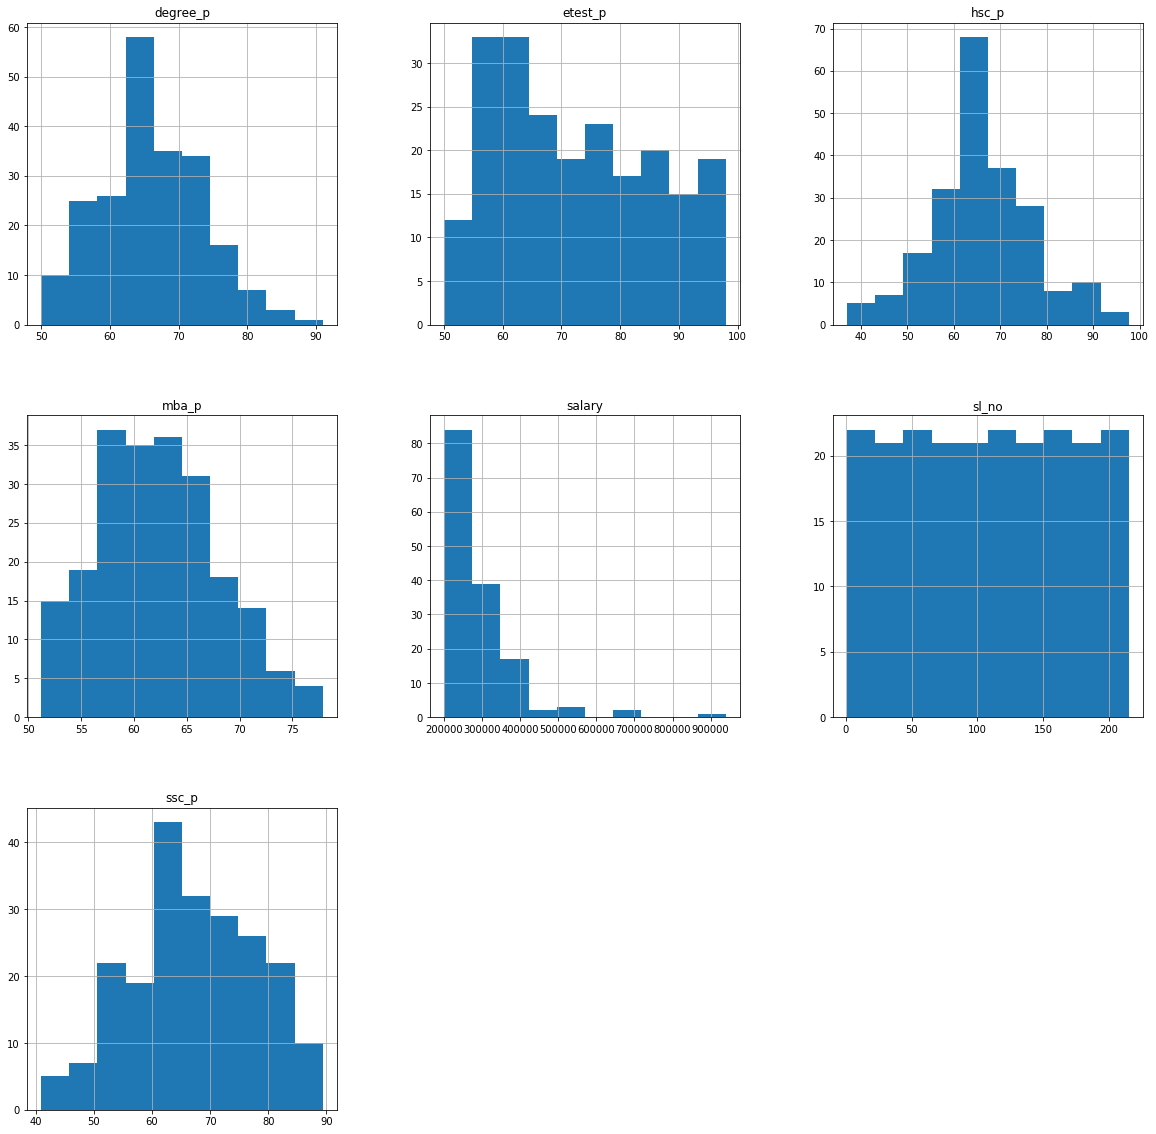

In [9]:
placement.hist(figsize=(20,20))

4. Feature Engineering: Discovering the new features in the dataset.

The specialization is done either in Marketing and HR or Marketing and Finance. I am trying to seperate the HR and Finance from the specialization and list them in the label specialization major. 

Defining the function specialization_major. I am comparing the word HR and Fin. If there is HR present then seperating as HR and if Fin present then seperating as Finance or if found anything else then sepearting as others, using nested if else loop. 

Examining the new Feature in the dataset

In [10]:
placement.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not_Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


5. Imputing the missing values in the dataset

The variable salary has a missing value. From the given dataset, it can be seen that if the candidates are placed, their salary is mentioned. But if the candidates are not placed their salary is not mentioned. First I will compute the percentage candidates who are not placed and their salary is not mention. 

In [11]:
placement.isnull(). sum()/len(placement)

sl_no             0.000000
gender            0.000000
ssc_p             0.000000
ssc_b             0.000000
hsc_p             0.000000
hsc_b             0.000000
hsc_s             0.000000
degree_p          0.000000
degree_t          0.000000
workex            0.000000
etest_p           0.000000
specialisation    0.000000
mba_p             0.000000
status            0.000000
salary            0.311628
dtype: float64

It can be seen that ~31% of the salary data is missing. I would be filling the missing value by mean of the salary w=of those candidates who are placed and their salary is mentioned. 

I am trying to fill the null values of salary by taking the overall mean. 

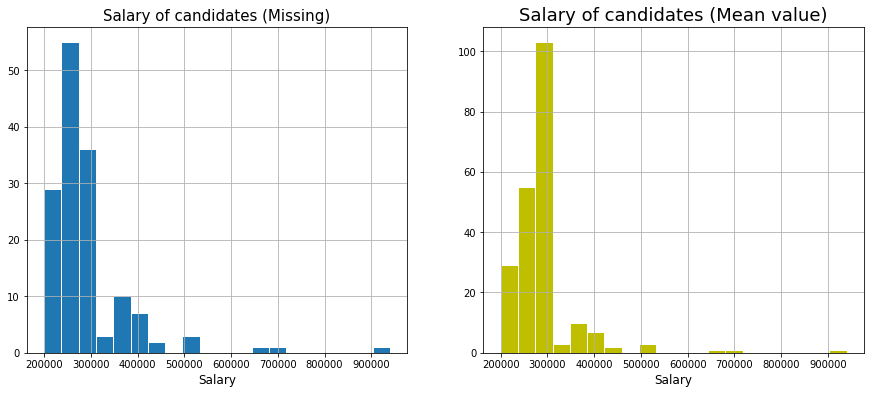

In [12]:
#Plotting the distribution of Salary (Missing values)
plt.subplot(1,2,1)
placement['salary'].hist(bins =20, figsize=(15,6), edgecolor = 'white')
plt.xlabel('Salary', fontsize =12)
plt.title('Salary of candidates (Missing)', fontsize =15)

#Plotting the distribution of Salary (Filling by mean)
plt.subplot(1,2,2)
placement_mean = pd.DataFrame(placement['salary'].fillna(placement.salary.mean()))
placement_mean['salary'].hist(bins=20, figsize=(15,6), edgecolor = 'white', color = 'y')
plt.xlabel('Salary', fontsize = 12)
plt.title('Salary of candidates (Mean value)', fontsize = 18)
plt.show()


When I am imputing the salary null with I still see that the data is right skewed and the salary is not normalized. In such a case my approach to fill the null salary value by the mean of the salary based on the specialisation. 

In [13]:
placement.groupby(['specialisation'])['salary'].mean()

specialisation
Mkt&Fin    298852.631579
Mkt&HR     270377.358491
Name: salary, dtype: float64

Text(0,0.5,'salary')

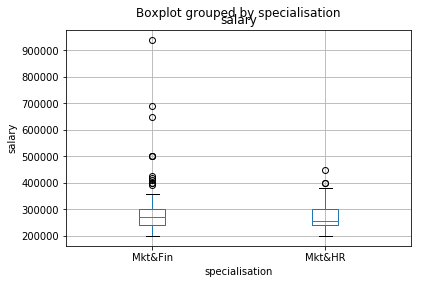

In [14]:
placement.boxplot(column = 'salary', by = 'specialisation')
plt.ylabel('salary')

In [15]:
placement['salary'].fillna(placement.groupby(["specialisation"])["salary"].transform(np.mean),inplace = True)

Text(0.5,1,'Distribution of Salary (Imputed by the mean of salary by specialisation)')

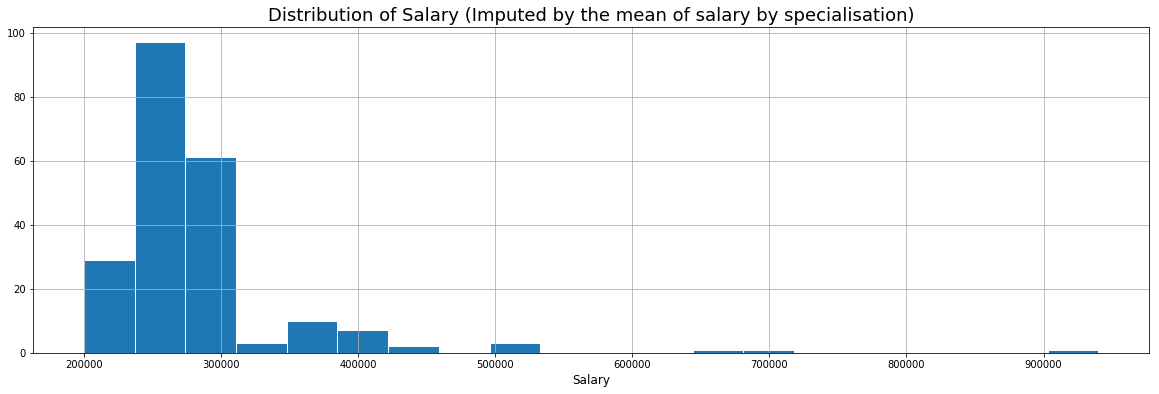

In [16]:
placement['salary'].hist(bins = 20, figsize = (20,6), edgecolor = 'white')
plt.xlabel('Salary', fontsize =12)
plt.title('Distribution of Salary (Imputed by the mean of salary by specialisation)', fontsize = 18)

6. Transformation of data

I see that the salary data is right skewed. Which means that the data is not normalized. In order to normalize this right skewed data, I will be applying log transformation to compress the long tail distribution to the small tail distribution and expand the lower tail distribution into long tail distribution.

Text(0.5,1,'Transformed Salary')

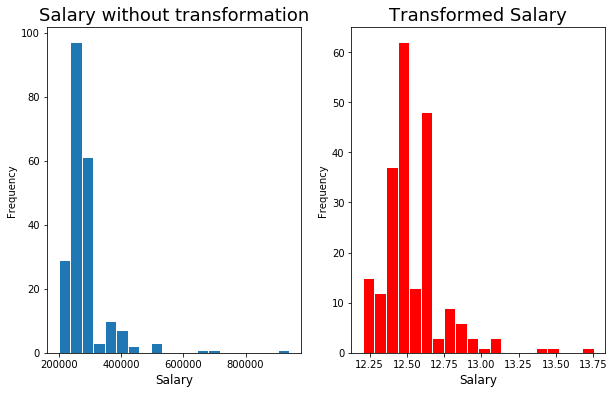

In [17]:
plt.subplot(1,2,1)
(placement['salary']).plot.hist(bins = 20, figsize = (10,6), edgecolor = 'white')
plt.xlabel('Salary', fontsize = 12)
plt.title('Salary without transformation', fontsize = 18)

plt.subplot(1,2,2)
np.log(placement['salary']+1).plot.hist(bins =20, figsize = (10,6), edgecolor = 'white', color = 'r')
plt.xlabel('Salary', fontsize = 12)
plt.title('Transformed Salary', fontsize =18)

7. Applying categorical Feature Engineering techniques.

I will analyze all the categorical data in the dataset to understand the data that are categorical and needs to be transformed into numerical. 

In [18]:
placement_categorical = placement.select_dtypes(include = ['object', 'category'])
placement_categorical.head()

,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
0,M,Others,Others,Commerce,Sci&Tech,No,Mkt&HR,Placed
1,M,Central,Others,Science,Sci&Tech,Yes,Mkt&Fin,Placed
2,M,Central,Central,Arts,Comm&Mgmt,No,Mkt&Fin,Placed
3,M,Central,Central,Science,Sci&Tech,No,Mkt&HR,Not_Placed
4,M,Central,Central,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed


From the above output I see that in the placement data I have several categorical features:
    1. SSC Board
    2. HSC Board
    3. HSC Stream
    4. Degree stream
    5. Work Experience
    6. MBA Specialization
    7. Status of the placement
    8. Gender
    
I need to convert this categorical data into numeric data. This can be done in two days: Label Encoding or One Hot Encoding method. I would be using Label Encoding Method to convert these categorical data into numeric data. 

In [19]:
status_rate = placement.status.value_counts()/215
status_rate

Placed        0.688372
Not_Placed    0.311628
Name: status, dtype: float64

In [20]:
cat_num = {"gender":     {"M": 1, "F": 0},
                "ssc_b": {"Others": 0, "Central": 1 },
                "hsc_b":{"Others":0, "Central":1},
                   "hsc_s": {"Science": 1, "Commerce": 2, "Arts": 3},
                   "degree_t": {"Sci&Tech": 1, "Comm&Mgmt" :2, "Others": 0},
                   "specialisation": {"Mkt&HR" : 1, "Mkt&Fin": 2},
                   "status":{"Placed" : 1, "Not_Placed": 0},
                "workex":{"Yes":1, "No":0}
                }

placement.replace(cat_num, inplace=True)
placement.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,1,67.00,0,91.00,0,2,58.00,1,0,55.0,1,58.80,1,270000.000000
1,2,1,79.33,1,78.33,0,1,77.48,1,1,86.5,2,66.28,1,200000.000000
2,3,1,65.00,1,68.00,1,3,64.00,2,0,75.0,2,57.80,1,250000.000000
3,4,1,56.00,1,52.00,1,1,52.00,1,0,66.0,1,59.43,0,270377.358491
4,5,1,85.80,1,73.60,1,2,73.30,2,0,96.8,2,55.50,1,425000.000000


### Data Visualization

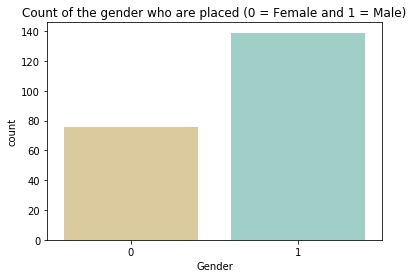

In [21]:
sns.countplot(x="gender", data = placement, palette = "BrBG")
plt.xlabel("Gender")
plt.title("Count of the gender who are placed (0 = Female and 1 = Male)")
plt.show()

It can be seen from the graph that Males are placed more than the female candidates. This might be possible because the companies must be gender biased. 

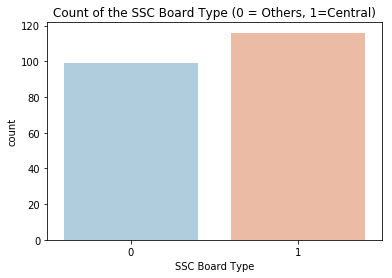

In [22]:
sns.countplot(x="ssc_b", data=placement, palette = "RdBu_r")
plt.xlabel("SSC Board Type")
plt.title("Count of the SSC Board Type (0 = Others, 1=Central)")
plt.show()


When SSC Board type data is plotted, it can be seen that the saximum students appeared for the Central board as comparedto the other board. But the difference between the students appeared for teh central board and the other board is not that huge. 

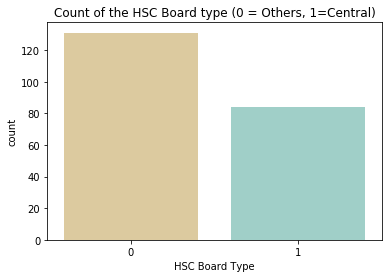

In [23]:
sns.countplot(x = "hsc_b", data=placement, palette = "BrBG")
plt.xlabel("HSC Board Type")
plt.title("Count of the HSC Board type (0 = Others, 1=Central)")
plt.show()

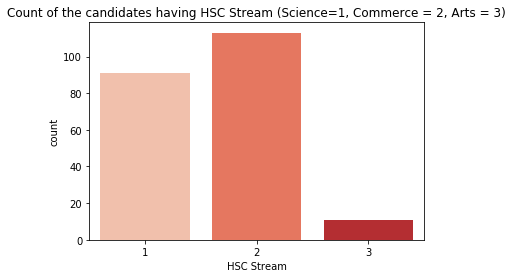

In [24]:
sns.countplot(x="hsc_s", data = placement, palette = "Reds")
plt.xlabel("HSC Stream")
plt.title("Count of the candidates having HSC Stream (Science=1, Commerce = 2, Arts = 3)")
plt.show()

Text(0.5,1,'Count of the canditates based on the Type of graduate degree (Sci&Tech=1, Comm&Mgmt=2, Others=0)')

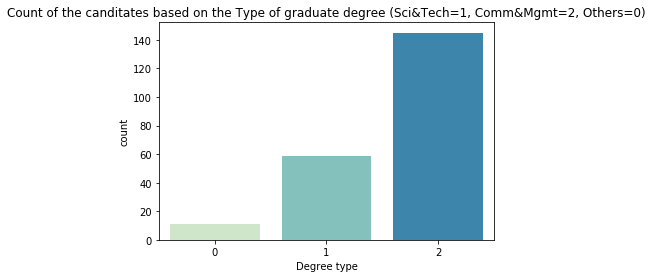

In [25]:
sns.countplot(x="degree_t", data=placement, palette = "GnBu")
plt.xlabel("Degree type")
plt.title("Count of the canditates based on the Type of graduate degree (Sci&Tech=1, Comm&Mgmt=2, Others=0)")

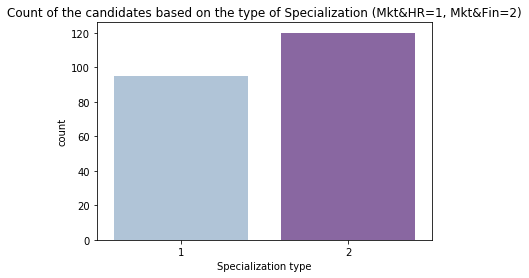

In [26]:
sns.countplot(x="specialisation", data=placement, palette = "BuPu")
plt.xlabel("Specialization type")
plt.title("Count of the candidates based on the type of Specialization (Mkt&HR=1, Mkt&Fin=2)")
plt.show()

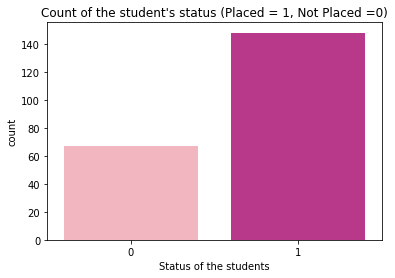

In [27]:
sns.countplot(x="status", data=placement, palette = "RdPu")
plt.xlabel("Status of the students")
plt.title("Count of the student's status (Placed = 1, Not Placed =0)")
plt.show()

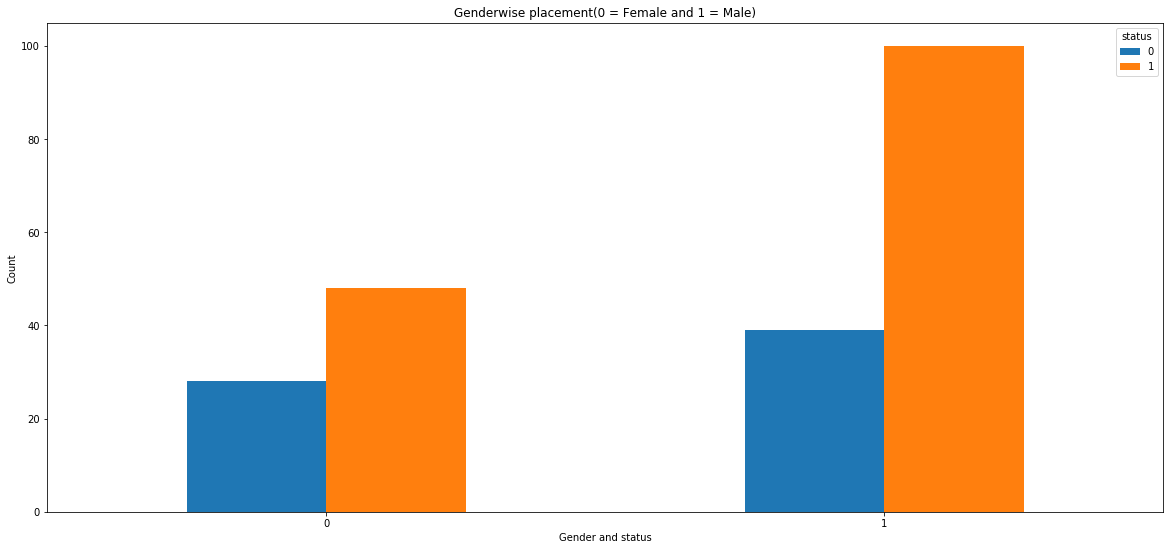

In [28]:
pd.crosstab(placement.gender, placement.status).plot(kind="bar",figsize = (20,9))
plt.title("Genderwise placement(0 = Female and 1 = Male)")
plt.xlabel("Gender and status")
plt.xticks(rotation = 360)
plt.ylabel("Count")
plt.show()

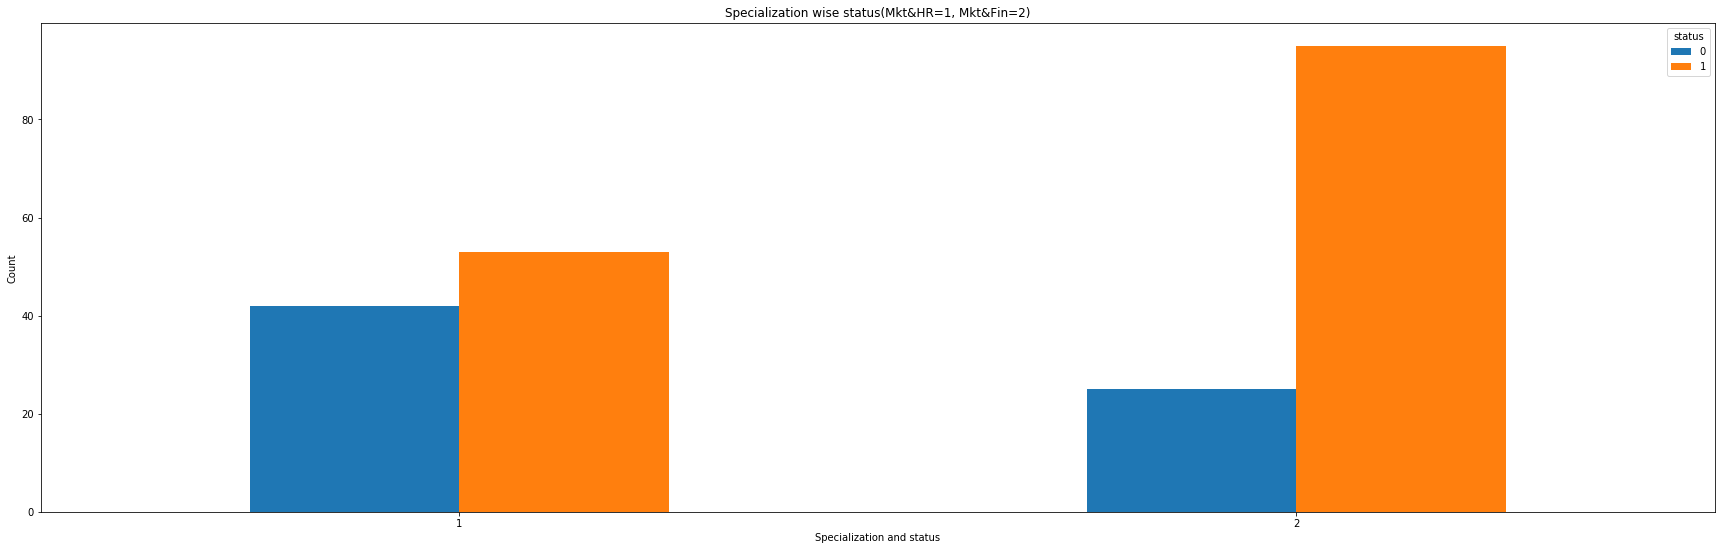

In [29]:
pd.crosstab(placement.specialisation, placement.status).plot(kind ="bar", figsize=(30,9))
plt.title("Specialization wise status(Mkt&HR=1, Mkt&Fin=2)")
plt.xlabel("Specialization and status")
plt.ylabel("Count")
plt.xticks(rotation = 360)
plt.show()

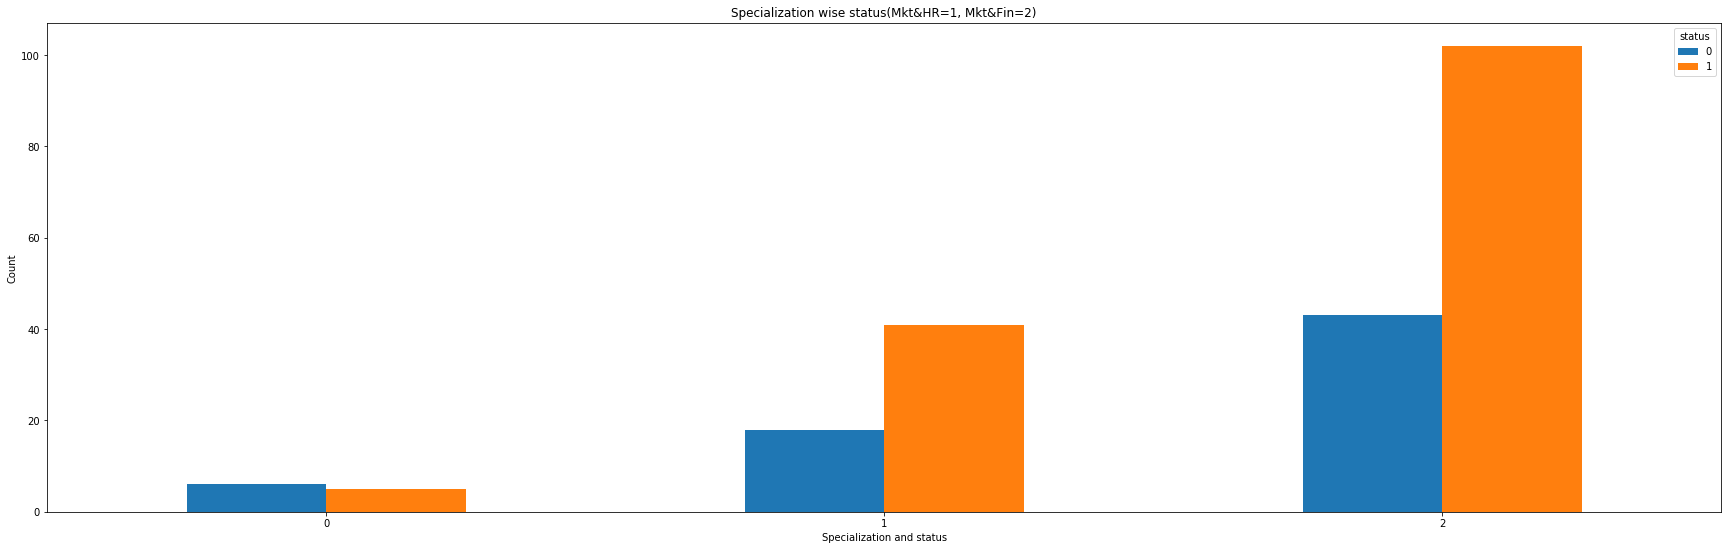

In [30]:
pd.crosstab(placement.degree_t, placement.status).plot(kind ="bar", figsize=(30,9))
plt.title("Specialization wise status(Mkt&HR=1, Mkt&Fin=2)")
plt.xlabel("Specialization and status")
plt.ylabel("Count")
plt.xticks(rotation = 360)
plt.show()

In [31]:
placement_summary = placement.groupby('status')
placement_summary.mean()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary
status,,,,,,,,,,,,,,
0,110.477612,0.582090,57.544030,0.567164,58.395522,0.402985,1.656716,61.134179,1.552239,0.149254,69.587910,1.373134,61.612836,281002.460389
1,106.878378,0.675676,71.721486,0.527027,69.926554,0.385135,1.614865,68.740541,1.655405,0.432432,73.238041,1.641892,62.579392,288655.405405


From the above result it can be said that the students who are been placed are maximum male with mean SSC percentage 71.72%, HSC percentage with mean of 69.92%, degree mean percentage of 68.74% and mean MBA percentage of 62.57%. The placement of the student depends not only on one factor but a cumulative of school, college, degree and masters percentage. Might be possible that the minimum percentage would have been teh criteria for the students to sit in the campus placement.  

Thus from the Exploratory data analysis it can be said that SSC and HSC percentage do affect the placement. A student must have minimum of 70% in SCC and 60% minimum in HSC to qualify to sit in campus placement. Studnt must have minimum of 60% in degree and MBA to qualify and sit for campus placement. If the student satistfy these criteria, he wuld be placed and the salary is dependent on the percentage as well as on the work experience and the type of MBA Degree.  




# DESIGN

In [32]:
input_variable = ['gender','ssc_p','ssc_b','hsc_p','hsc_b','hsc_s','degree_p','degree_t','workex','etest_p','specialisation','mba_p','salary']
placement['output_variable'] = (placement.status).astype('int')
data_for_model = placement[input_variable + ['output_variable']]
data_for_model.head(10)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary,output_variable
0,1,67.00,0,91.00,0,2,58.00,1,0,55.00,1,58.80,270000.000000,1
1,1,79.33,1,78.33,0,1,77.48,1,1,86.50,2,66.28,200000.000000,1
2,1,65.00,1,68.00,1,3,64.00,2,0,75.00,2,57.80,250000.000000,1
3,1,56.00,1,52.00,1,1,52.00,1,0,66.00,1,59.43,270377.358491,0
4,1,85.80,1,73.60,1,2,73.30,2,0,96.80,2,55.50,425000.000000,1
5,1,55.00,0,49.80,0,1,67.25,1,1,55.00,2,51.58,298852.631579,0
6,0,46.00,0,49.20,0,2,79.00,2,0,74.28,2,53.29,298852.631579,0
7,1,82.00,1,64.00,1,1,66.00,1,1,67.00,2,62.14,252000.000000,1
8,1,73.00,1,79.00,1,2,72.00,2,0,91.34,2,61.29,231000.000000,1
9,1,58.00,1,70.00,1,2,61.00,2,0,54.00,2,52.21,298852.631579,0


First I will seperate the 30 % dataset as the test dataset. 

In [33]:
# Save 30% of the data as validation and test data 
placement_valid_and_test = data_for_model.sample(frac=0.30,random_state=42)
print('Splitted size: %.3f'%(len(placement_valid_and_test)/len(data_for_model)))

Splitted size: 0.298


Now I will divide this 30% of the test data as 15% test and 15% validation. 

In [34]:
placement_test = placement_valid_and_test.sample(frac = 0.5, random_state = 42)
placement_valid = placement_valid_and_test.drop(placement_test.index)

Now I will use result of the 70% of the dataset as the training dataset. 

In [35]:
placement_train = data_for_model.drop(placement_valid_and_test.index)

At this point, let's check what percent of the candidates are placed. This is known as prevalence. Ideally, all three groups would have similar prevalance.

In [36]:
def calc_prevalence(y_actual):
    return (sum(y_actual)/len(y_actual))

In [37]:
print('Test prevalence(n = %d):%.3f'%(len(placement_test),calc_prevalence(placement_test.output_variable.values)))
print('Valid prevalence(n = %d):%.3f'%(len(placement_valid),calc_prevalence(placement_valid.output_variable.values)))
print('Train all prevalence(n = %d):%.3f'%(len(placement_train), calc_prevalence(placement_train.output_variable.values)))

Test prevalence(n = 32):0.656
Valid prevalence(n = 32):0.719
Train all prevalence(n = 151):0.689


Testing whether all of the data is being used. 

In [38]:
X_train_tf =placement_train
X_valid_tf = placement_valid

In [39]:
y_train = placement_train['output_variable'].values
y_valid = placement_valid['output_variable'].values

Splitting the dataset into train, test and validation

# KNN

In [40]:
# k-nearest neighbors
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors =15 )
knn.fit(X_train_tf, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='uniform')

In [41]:
y_train_preds = knn.predict_proba(X_train_tf)[:,1]
y_valid_preds = knn.predict_proba(X_valid_tf)[:,1]

In [42]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score

def calc_specificity(y_actual, y_pred, thresh):
    # calculates specificity
    return sum((y_pred < thresh) & (y_actual == 0)) /sum(y_actual ==0)

def print_report(y_actual, y_pred, thresh):
    
    auc = roc_auc_score(y_actual, y_pred)
    accuracy = accuracy_score(y_actual, (y_pred > thresh))
    recall = recall_score(y_actual, (y_pred > thresh))
    precision = precision_score(y_actual, (y_pred > thresh))
    specificity = calc_specificity(y_actual, y_pred, thresh)
    print('AUC:%.3f'%auc)
    print('accuracy:%.3f'%accuracy)
    print('recall:%.3f'%recall)
    print('precision:%.3f'%precision)
    print('specificity:%.3f'%specificity)
    print('prevalence:%.3f'%calc_prevalence(y_actual))
    print(' ')
    return auc, accuracy, recall, precision, specificity

In [43]:
thresh = 0.5

In [44]:
print('KNN Model')
print('Training:')
knn_train_auc, knn_train_auccuracy, knn_train_recall, knn_train_precision, knn_train_specificity=print_report(y_train,y_train_preds, thresh)
print('Validation:')
knn_valid_auc, knn_valid_auccuracy, knn_valid_recall, knn_valid_precision, knn_valid_specificity =print_report(y_valid,y_valid_preds, thresh)

KNN Model
Training:
AUC:1.000
accuracy:0.927
recall:0.894
precision:1.000
specificity:1.000
prevalence:0.689
 
Validation:
AUC:0.978
accuracy:0.875
recall:0.826
precision:1.000
specificity:1.000
prevalence:0.719
 


# Logistic Regression

In [45]:
#Logistic Regression 
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state = 42)
log_reg.fit(X_train_tf, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [46]:
y_train_preds = log_reg.predict_proba(X_train_tf)[:,1]
y_valid_preds = log_reg.predict_proba(X_valid_tf)[:,1]

In [47]:
print('Logistic Regression')
print('Training:')
log_reg_train_auc, log_reg_train_accuracy, log_reg_train_recall, log_reg_train_precision, log_reg_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
log_reg_valid_auc, log_reg_valid_accuracy, log_reg_valid_recall, log_reg_valid_precision, log_reg_valid_specificity =print_report(y_valid,y_valid_preds, thresh)

Logistic Regression
Training:
AUC:0.938
accuracy:0.874
recall:0.971
precision:0.863
specificity:0.660
prevalence:0.689
 
Validation:
AUC:0.855
accuracy:0.812
recall:0.957
precision:0.815
specificity:0.444
prevalence:0.719
 


# Decision Tree

In [48]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
dec_cls = DecisionTreeClassifier(max_depth = 15, random_state = 42)
dec_cls.fit(X_train_tf, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=15,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [49]:
y_train_preds = dec_cls.predict_proba(X_train_tf)[:,1]
y_valid_preds = dec_cls.predict_proba(X_valid_tf)[:,1]

In [50]:
print('Decision Tree')
print('Training:')
dec_cls_train_auc, dec_cls_train_accuracy, dec_cls_train_recall, dec_cls_train_precision, dec_cls_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
dec_cls_valid_auc, dec_cls_valid_accuracy, dec_cls_valid_recall, dec_cls_valid_precision, dec_cls_valid_specificity =print_report(y_valid,y_valid_preds, thresh)


Decision Tree
Training:
AUC:1.000
accuracy:1.000
recall:1.000
precision:1.000
specificity:1.000
prevalence:0.689
 
Validation:
AUC:1.000
accuracy:1.000
recall:1.000
precision:1.000
specificity:1.000
prevalence:0.719
 


# Random Forest

In [51]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rdm_cls = RandomForestClassifier(max_depth = 6, random_state=42)
rdm_cls.fit(X_train_tf, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [52]:
y_train_preds = rdm_cls.predict_proba(X_train_tf)[:,1]
y_valid_preds = rdm_cls.predict_proba(X_valid_tf)[:,1]

In [53]:
print('Random Forest')
print('Training:')
rdm_cls_train_auc, rdm_cls_train_accuracy, rdm_cls_train_recall, rdm_cls_train_precision, rdm_cls_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
rdm_cls_valid_auc, rdm_cls_valid_accuracy, rdm_cls_valid_recall, rdm_cls_valid_precision, rdm_cls_valid_specificity =print_report(y_valid,y_valid_preds, thresh)


Random Forest
Training:
AUC:1.000
accuracy:1.000
recall:1.000
precision:1.000
specificity:1.000
prevalence:0.689
 
Validation:
AUC:1.000
accuracy:1.000
recall:1.000
precision:1.000
specificity:1.000
prevalence:0.719
 


# Gradient Boosting

In [54]:
#Gradient Boosting 
from sklearn.ensemble import GradientBoostingClassifier
grad_cls = GradientBoostingClassifier()
grad_cls.fit(X_train_tf, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [55]:
y_train_preds = grad_cls.predict_proba(X_train_tf)[:,1]
y_valid_preds = grad_cls.predict_proba(X_valid_tf)[:,1]

In [56]:
print('Gradient Boosting')
print('Training:')
grad_cls_train_auc, grad_cls_train_accuracy, grad_cls_train_recall, grad_cls_train_precision, grad_cls_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
grad_cls_valid_auc, grad_cls_valid_accuracy, grad_cls_valid_recall, grad_cls_valid_precision, grad_cls_valid_specificity =print_report(y_valid,y_valid_preds, thresh)


Gradient Boosting
Training:
AUC:1.000
accuracy:1.000
recall:1.000
precision:1.000
specificity:1.000
prevalence:0.689
 
Validation:
AUC:1.000
accuracy:1.000
recall:1.000
precision:1.000
specificity:1.000
prevalence:0.719
 


# Gaussian Naive Bayes

In [57]:
from sklearn.naive_bayes import GaussianNB
gau_nb = GaussianNB()
gau_nb.fit(X_train_tf, y_train)

GaussianNB(priors=None)

In [58]:
y_train_preds = gau_nb.predict_proba(X_train_tf)[:,1]
y_valid_preds = gau_nb.predict_proba(X_valid_tf)[:,1]

In [59]:
print('Gaussian Naive Bayes')
print('Training:')
gau_nb_train_auc, gau_nb_train_accuracy, gau_nb_train_recall, gau_nb_train_precision, gau_nb_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
gau_nb_valid_auc, gau_nb_valid_accuracy, gau_nb_valid_recall, gau_nb_valid_precision, gau_nb_valid_specificity =print_report(y_valid,y_valid_preds, thresh)


Gaussian Naive Bayes
Training:
AUC:0.962
accuracy:0.881
recall:0.885
precision:0.939
specificity:0.872
prevalence:0.689
 
Validation:
AUC:0.918
accuracy:0.812
recall:0.913
precision:0.840
specificity:0.556
prevalence:0.719
 


# Stochastic Gradient Descent

In [60]:
from sklearn.linear_model import SGDClassifier
sdg_cl = SGDClassifier(loss = 'log',alpha = 0.1,random_state = 42)
sdg_cl.fit(X_train_tf, y_train)

SGDClassifier(alpha=0.1, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [61]:
y_train_preds = sdg_cl.predict_proba(X_train_tf)[:,1]
y_valid_preds = sdg_cl.predict_proba(X_valid_tf)[:,1]

In [62]:
print('Stochastic Gradient Descent')
print('Training:')
sdg_cl_train_auc, sdg_cl_train_accuracy, sdg_cl_train_recall, sdg_cl_train_precision, sdg_cl_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
sdg_cl_valid_auc, sdg_cl_valid_accuracy, sdg_cl_valid_recall, sdg_cl_valid_precision, sdg_cl_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Stochastic Gradient Descent
Training:
AUC:0.500
accuracy:0.311
recall:0.000
precision:0.000
specificity:1.000
prevalence:0.689
 
Validation:
AUC:0.500
accuracy:0.281
recall:0.000
precision:0.000
specificity:1.000
prevalence:0.719
 


In [63]:
df_results = pd.DataFrame({'classifier':['KNN','KNN','LR','LR','SGD','SGD','NB','NB','DT','DT','RF','RF','GB','GB'],
                           'data_set':['train','valid']*7,
                          'auc':[knn_train_auc, knn_valid_auc, log_reg_train_auc, log_reg_valid_auc, sdg_cl_train_auc, sdg_cl_valid_auc, gau_nb_train_auc, gau_nb_valid_auc, dec_cls_train_auc, dec_cls_valid_auc, rdm_cls_train_auc, rdm_cls_valid_auc, grad_cls_valid_auc, grad_cls_valid_auc,],
                         'accuracy':[knn_train_auccuracy, knn_valid_auccuracy, log_reg_train_accuracy, log_reg_valid_accuracy, sdg_cl_train_accuracy, sdg_cl_valid_accuracy, gau_nb_train_accuracy, gau_nb_valid_accuracy, dec_cls_train_accuracy, dec_cls_valid_accuracy, rdm_cls_train_accuracy, rdm_cls_valid_accuracy, grad_cls_valid_accuracy, grad_cls_valid_accuracy,],
                          'recall':[knn_train_recall, knn_valid_recall, log_reg_train_recall, log_reg_valid_recall, sdg_cl_train_recall, sdg_cl_valid_recall, gau_nb_train_recall, gau_nb_valid_recall, dec_cls_train_recall, dec_cls_valid_recall, rdm_cls_train_recall, rdm_cls_valid_recall, grad_cls_valid_recall, grad_cls_valid_recall,],
                          'precision':[knn_train_precision, knn_valid_precision, log_reg_train_precision, log_reg_valid_precision, sdg_cl_train_precision, sdg_cl_valid_precision, gau_nb_train_precision, gau_nb_valid_precision, dec_cls_train_precision, dec_cls_valid_precision, rdm_cls_train_precision, rdm_cls_valid_precision, grad_cls_valid_auc, grad_cls_valid_precision,],
                          'specificity':[knn_train_specificity, knn_valid_specificity, log_reg_train_specificity, log_reg_valid_specificity, sdg_cl_train_specificity, sdg_cl_valid_specificity, gau_nb_train_specificity, gau_nb_valid_specificity,dec_cls_train_specificity, dec_cls_valid_specificity, rdm_cls_train_specificity, rdm_cls_valid_specificity, grad_cls_valid_specificity, grad_cls_valid_specificity,]})

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

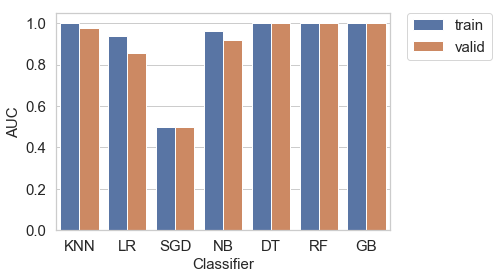

In [65]:
ax = sns.barplot(x="classifier", y="auc", hue="data_set", data=df_results)
ax.set_xlabel('Classifier',fontsize = 15)
ax.set_ylabel('AUC', fontsize = 15)
ax.tick_params(labelsize=15)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)
plt.show()

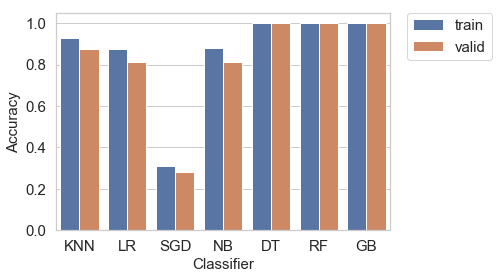

In [66]:
ax = sns.barplot(x="classifier", y="accuracy", hue="data_set", data=df_results)
ax.set_xlabel('Classifier',fontsize = 15)
ax.set_ylabel('Accuracy', fontsize = 15)
ax.tick_params(labelsize=15)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)
plt.show()

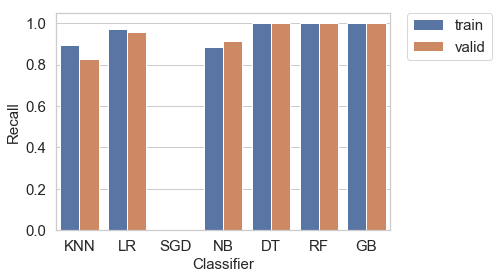

In [67]:
ax = sns.barplot(x="classifier", y="recall", hue="data_set", data=df_results)
ax.set_xlabel('Classifier',fontsize = 15)
ax.set_ylabel('Recall', fontsize = 15)
ax.tick_params(labelsize=15)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)
plt.show()

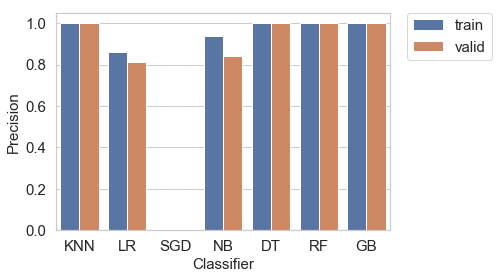

In [68]:
ax = sns.barplot(x="classifier", y="precision", hue="data_set", data=df_results)
ax.set_xlabel('Classifier',fontsize = 15)
ax.set_ylabel('Precision', fontsize = 15)
ax.tick_params(labelsize=15)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)
plt.show()

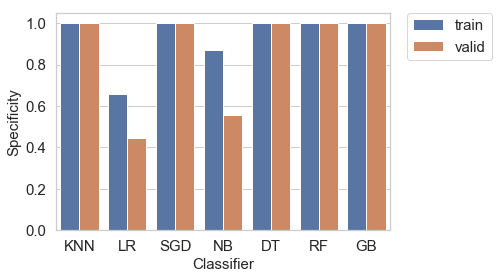

In [69]:
ax = sns.barplot(x="classifier", y="specificity", hue="data_set", data=df_results)
ax.set_xlabel('Classifier',fontsize = 15)
ax.set_ylabel('Specificity', fontsize = 15)
ax.tick_params(labelsize=15)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)
plt.show()